In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# File paths
train_path = "/content/drive/MyDrive/Colab Notebooks/Gene_analysis/data_set_ALL_AML_train.csv"
test_path = "/content/drive/MyDrive/Colab Notebooks/Gene_analysis/data_set_ALL_AML_independent.csv"
actual_path = "/content/drive/MyDrive/Colab Notebooks/Gene_analysis/actual.csv"

# Load datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
actual_df = pd.read_csv(actual_path)

# Display the first few rows of each dataset
train_df.head(), test_df.head(), actual_df.head()


(                      Gene Description Gene Accession Number    1 call    2  \
 0  AFFX-BioB-5_at (endogenous control)        AFFX-BioB-5_at -214    A -139   
 1  AFFX-BioB-M_at (endogenous control)        AFFX-BioB-M_at -153    A  -73   
 2  AFFX-BioB-3_at (endogenous control)        AFFX-BioB-3_at  -58    A   -1   
 3  AFFX-BioC-5_at (endogenous control)        AFFX-BioC-5_at   88    A  283   
 4  AFFX-BioC-3_at (endogenous control)        AFFX-BioC-3_at -295    A -264   
 
   call.1    3 call.2    4 call.3  ...   29 call.33   30 call.34   31 call.35  \
 0      A  -76      A -135      A  ...   15       A -318       A  -32       A   
 1      A  -49      A -114      A  ... -114       A -192       A  -49       A   
 2      A -307      A  265      A  ...    2       A  -95       A   49       A   
 3      A  309      A   12      A  ...  193       A  312       A  230       P   
 4      A -376      A -419      A  ...  -51       A -139       A -367       A   
 
     32 call.36   33 call.37  

In [3]:
# Fix dataset cleaning by dropping 'Gene Description' before transposing
def clean_dataset_fixed(df):
    df = df.drop(columns=["Gene Description"])  # Drop non-numeric column before transposing
    df = df.set_index("Gene Accession Number").T  # Transpose so patients are rows
    df.columns.name = None  # Remove column index name
    df.reset_index(inplace=True)  # Reset index to turn patient IDs into a column
    df.rename(columns={"index": "patient"}, inplace=True)  # Rename patient column
    df["patient"] = pd.to_numeric(df["patient"], errors="coerce")  # Convert to numeric, force errors to NaN
    df.dropna(subset=["patient"], inplace=True)  # Drop rows where 'patient' is NaN
    df["patient"] = df["patient"].astype(int)  # Convert to integers
    return df

# Clean training and test datasets
train_clean = clean_dataset_fixed(train_df)
test_clean = clean_dataset_fixed(test_df)

# Merge with labels
train_merged = train_clean.merge(actual_df, on="patient", how="left")
test_merged = test_clean.merge(actual_df, on="patient", how="left")

# Display cleaned dataset
train_merged.head()


,patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,511,-125,389,-37,793,329,36,191,-37,ALL
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,837,-36,442,-17,782,295,11,76,-14,ALL
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,1199,33,168,52,1138,777,41,228,-41,ALL
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,835,218,174,-110,627,170,-50,126,-91,ALL
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,649,57,504,-26,250,314,14,56,-25,ALL


In [4]:
# Remove unnecessary text columns before transposing
def clean_dataset_fixed(df):
    df = df.drop(columns=["Gene Description"])  # Keep only numeric values
    df = df.set_index("Gene Accession Number").T  # Transpose to have patients as rows
    df.columns.name = None  # Remove column index name
    df = df.reset_index().rename(columns={"index": "patient"})  # Rename patient column
    df["patient"] = pd.to_numeric(df["patient"], errors="coerce")  # Convert patient IDs to numeric
    df = df.dropna().astype({"patient": int})  # Remove NaN and convert to int
    return df

# Clean training and test datasets
train_clean = clean_dataset_fixed(train_df)
test_clean = clean_dataset_fixed(test_df)

# Merge with labels
train_merged = train_clean.merge(actual_df, on="patient", how="left")
test_merged = test_clean.merge(actual_df, on="patient", how="left")

# Display cleaned dataset
train_merged.head()


,patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
0,1,-214,-153,-58,88,-295,-558,199,-176,252,...,511,-125,389,-37,793,329,36,191,-37,ALL
1,2,-139,-73,-1,283,-264,-400,-330,-168,101,...,837,-36,442,-17,782,295,11,76,-14,ALL
2,3,-76,-49,-307,309,-376,-650,33,-367,206,...,1199,33,168,52,1138,777,41,228,-41,ALL
3,4,-135,-114,265,12,-419,-585,158,-253,49,...,835,218,174,-110,627,170,-50,126,-91,ALL
4,5,-106,-125,-76,168,-230,-284,4,-122,70,...,649,57,504,-26,250,314,14,56,-25,ALL


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Convert gene expression values to numeric (excluding 'patient' and 'cancer')
feature_cols = train_merged.columns[1:-1]  # All columns except 'patient' and 'cancer'

train_merged[feature_cols] = train_merged[feature_cols].apply(pd.to_numeric, errors='coerce')
test_merged[feature_cols] = test_merged[feature_cols].apply(pd.to_numeric, errors='coerce')

# Encode the target variable
label_encoder = LabelEncoder()
train_merged["cancer"] = label_encoder.fit_transform(train_merged["cancer"])
test_merged["cancer"] = label_encoder.transform(test_merged["cancer"])

# Normalize the gene expression data
scaler = StandardScaler()
train_merged[feature_cols] = scaler.fit_transform(train_merged[feature_cols])
test_merged[feature_cols] = scaler.transform(test_merged[feature_cols])

# Display the processed dataset
train_merged.head()


,patient,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,cancer
0,1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,...,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875,0
1,2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,...,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648,0
2,3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,...,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270,0
3,4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,...,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712,0
4,5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,...,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311,0


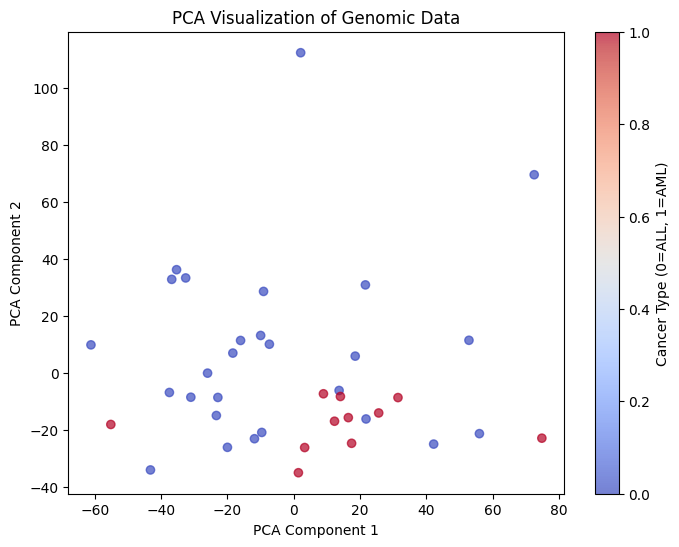

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract features and target
X_train = train_merged[feature_cols]
y_train = train_merged["cancer"]

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Genomic Data")
plt.colorbar(label="Cancer Type (0=ALL, 1=AML)")
plt.show()


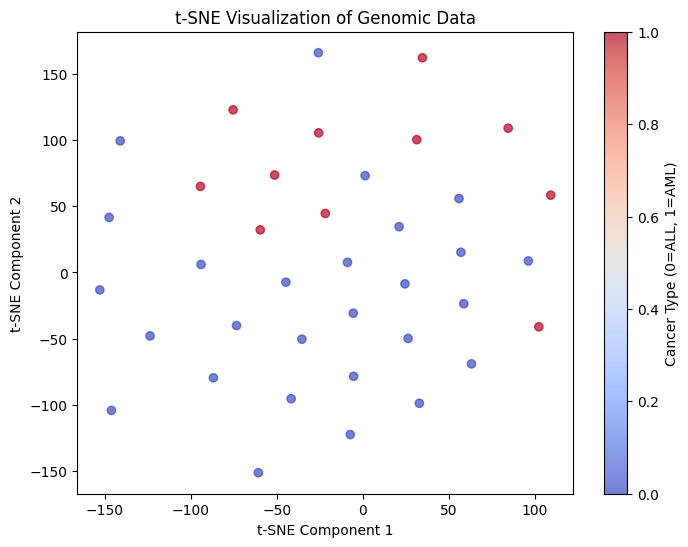

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE (reduce to 2D for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_train)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Genomic Data")
plt.colorbar(label="Cancer Type (0=ALL, 1=AML)")
plt.show()


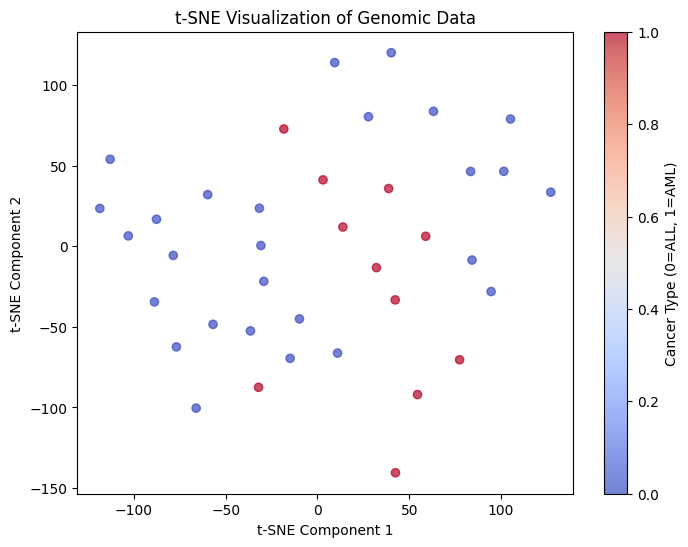

In [8]:
# Use all available data instead of sampling
X_sample = X_train  # No sampling to avoid the error
y_sample = y_train

# Apply t-SNE with optimized parameters
tsne = TSNE(n_components=2, random_state=42, perplexity=10, learning_rate=100)
X_tsne_transformed = tsne.fit_transform(X_sample)

# Plot optimized t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_transformed[:, 0], X_tsne_transformed[:, 1], c=y_sample, cmap="coolwarm", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Genomic Data")
plt.colorbar(label="Cancer Type (0=ALL, 1=AML)")
plt.show()


In [9]:
import numpy as np
from scipy.stats import ttest_ind

# Perform t-test for each gene using apply (faster than dictionary comprehension)
p_values = X_train.apply(lambda gene: ttest_ind(gene[y_train == 0], gene[y_train == 1], equal_var=False).pvalue, axis=0)

# Convert to DataFrame and sort by significance
ttest_df = pd.DataFrame({"Gene": feature_cols, "p-value": p_values}).sort_values(by="p-value")

# Display top 10 most significant genes
print(ttest_df.head(10))


                              Gene       p-value
U22376_cds2_s_at  U22376_cds2_s_at  8.388715e-09
X59417_at                X59417_at  9.821652e-08
M55150_at                M55150_at  2.472593e-07
M31211_s_at            M31211_s_at  2.917295e-07
L13278_at                L13278_at  3.251349e-07
D26156_s_at            D26156_s_at  5.184004e-07
M92287_at                M92287_at  6.826528e-07
U09087_s_at            U09087_s_at  7.413020e-07
U05259_rna1_at      U05259_rna1_at  1.314936e-06
X74262_at                X74262_at  1.488034e-06


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and labels
X_train_final = X_train
y_train_final = y_train
X_test_final = test_merged[feature_cols]
y_test_final = test_merged["cancer"]

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_final, y_train_final)

# Predictions
y_pred = rf_model.predict(X_test_final)

# Evaluate Model
accuracy = accuracy_score(y_test_final, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Detailed Report
print(classification_report(y_test_final, y_pred))



Model Accuracy: 0.7353
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        20
           1       1.00      0.36      0.53        14

    accuracy                           0.74        34
   macro avg       0.84      0.68      0.67        34
weighted avg       0.82      0.74      0.70        34



                   Gene  Importance
2019          M55150_at    0.027593
5898  HG627-HT5097_s_at    0.023679
759           D88422_at    0.018972
5771   U22376_cds2_s_at    0.018766
1833          M23197_at    0.017642
6683        X83490_s_at    0.017470
3506          U62136_at    0.016984
2266          M81933_at    0.016294
1806     M21551_rna1_at    0.014957
2885          U19878_at    0.013110


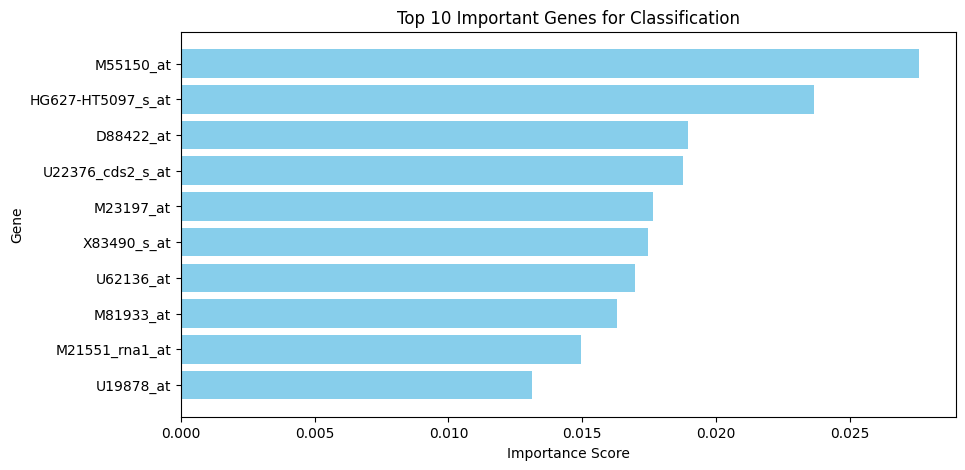

In [11]:
# Get feature importance scores
feature_importances = pd.DataFrame({"Gene": feature_cols, "Importance": rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Display top 10 important genes
print(feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(feature_importances["Gene"][:10], feature_importances["Importance"][:10], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Gene")
plt.title("Top 10 Important Genes for Classification")
plt.gca().invert_yaxis()
plt.show()

